In [174]:
source("C:/Users/Tom Work/PycharmProjects/twipsy-lite/ts.R")

In [54]:
june_over = preprocessing('E:/from-hpc/age/summary/over/casual.csv', 'E:/summary/june_total.csv')
june_under = preprocessing('E:/from-hpc/age/summary/under/casual.csv', 'E:/summary/june_total.csv')
june_over_perc = ts((june_over$series/june_over$total), frequency=24)
june_under_perc = ts((june_under$series/june_under$total), frequency=24)

 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723


In [89]:
jo = ts(june_over$series[33:(24*30-16)], frequency=24)
ju = ts(june_under$series[33:(24*30-16)], frequency=24)

In [108]:
jo = ts(june_over_perc[33:(24*30-16)], frequency=24)
ju = ts(june_under_perc[33:(24*30-16)], frequency=24)

In [160]:
june = june_ts()

 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723


In [115]:
total = june_under$total[33:(24*30-16)]

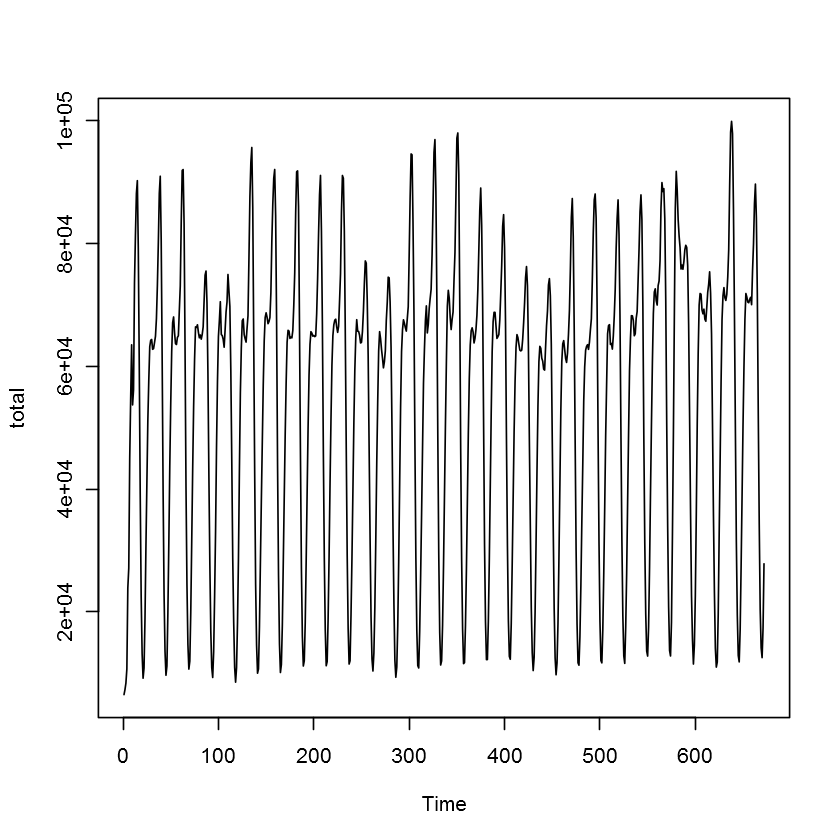

In [156]:
plot.ts(total)

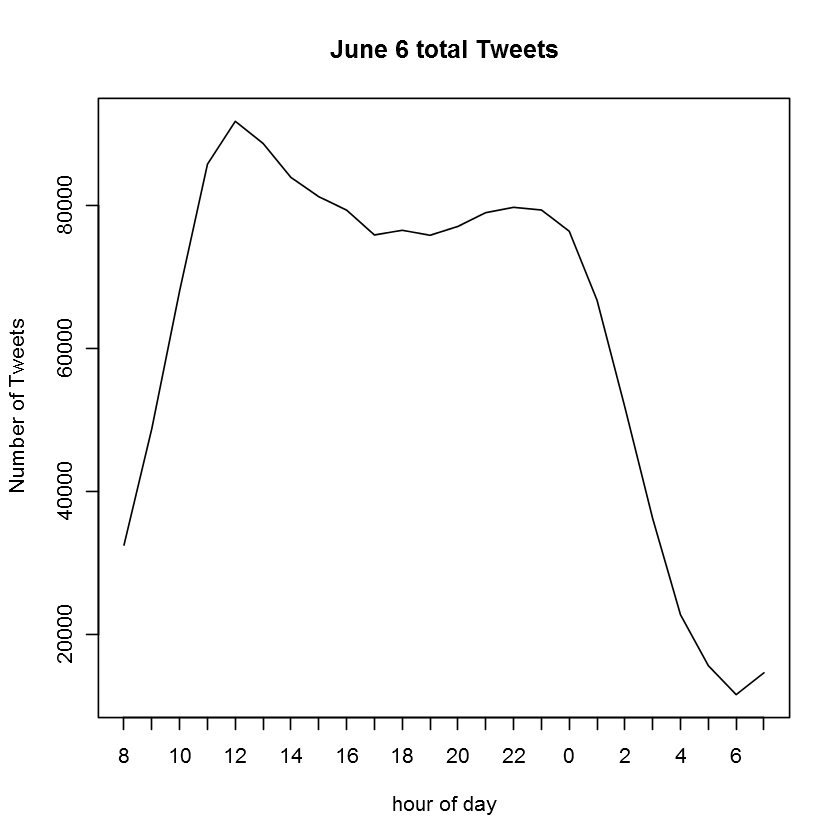

In [159]:
start = 24*24
plot.ts(total[(start):(start+23)], xaxt='n', xlab='hour of day', ylab='Number of Tweets', main='June 6 total Tweets')
axis(1, at=c(1:24), labels=c(c(8:23), c(0:7)))

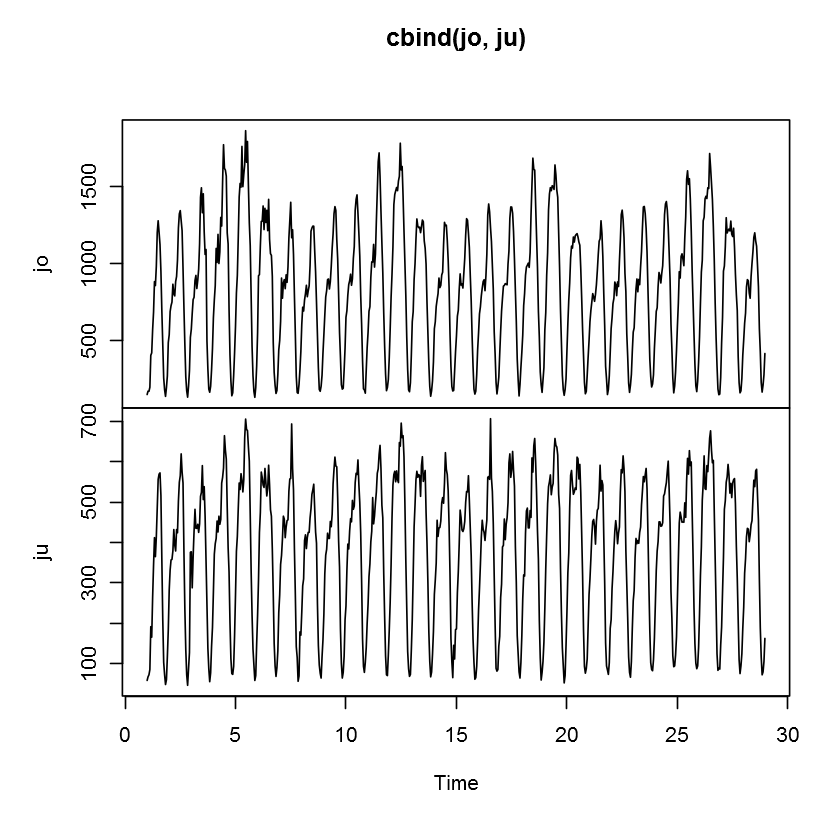

In [103]:
plot.ts(cbind(jo, ju))

Breakdown by day of week:

In [110]:
j_by_weekday = day_of_week(c(as.vector(jo), as.vector(ju)))

In [111]:
weekdays = c('Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday')

Percent tweets by day

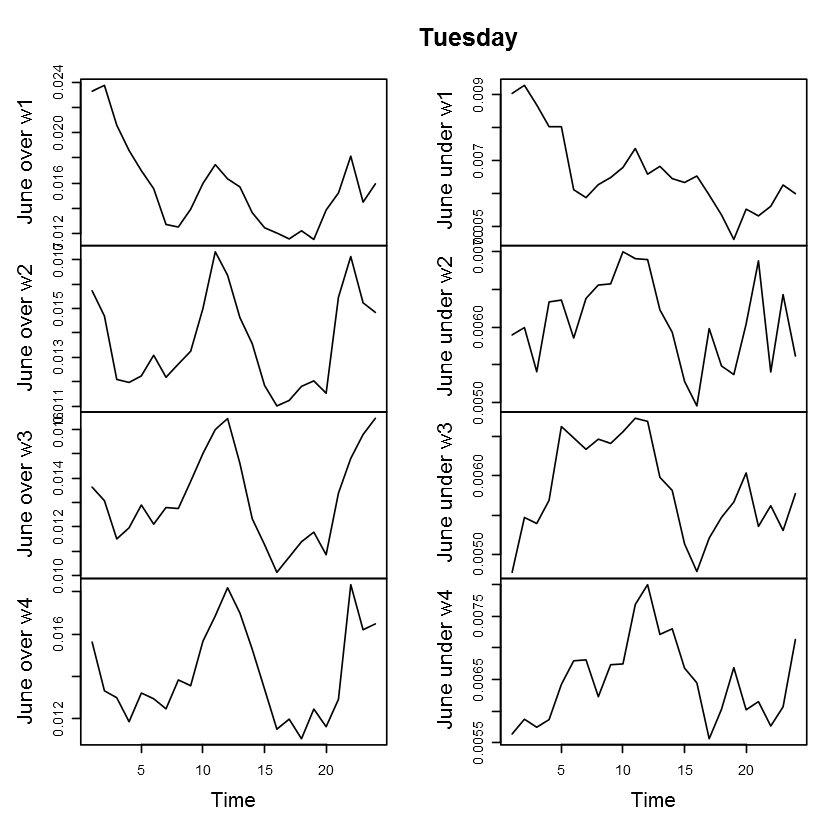

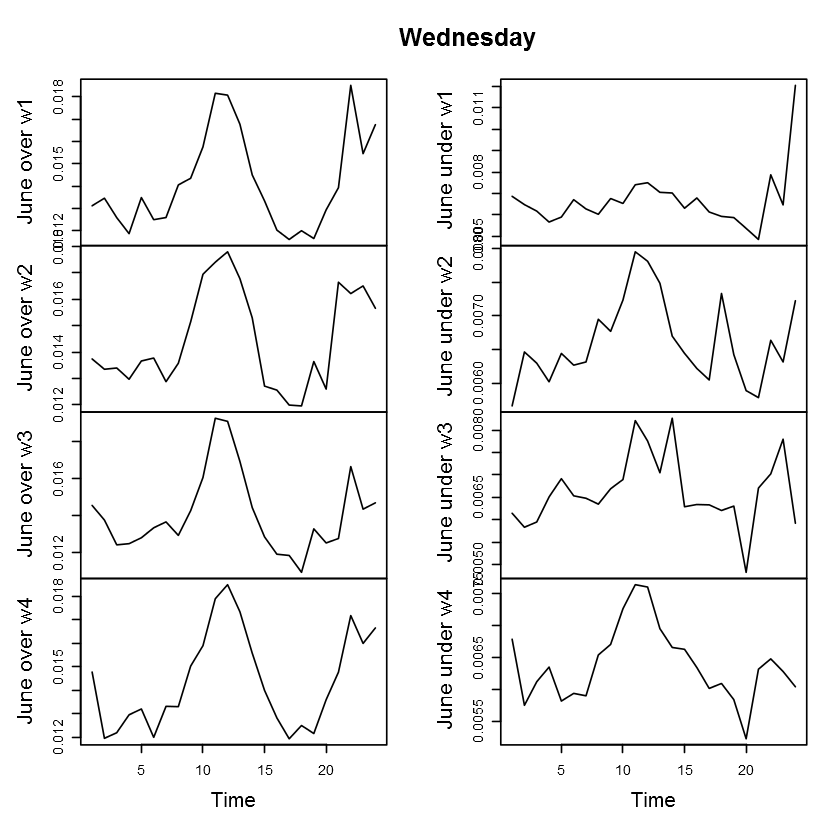

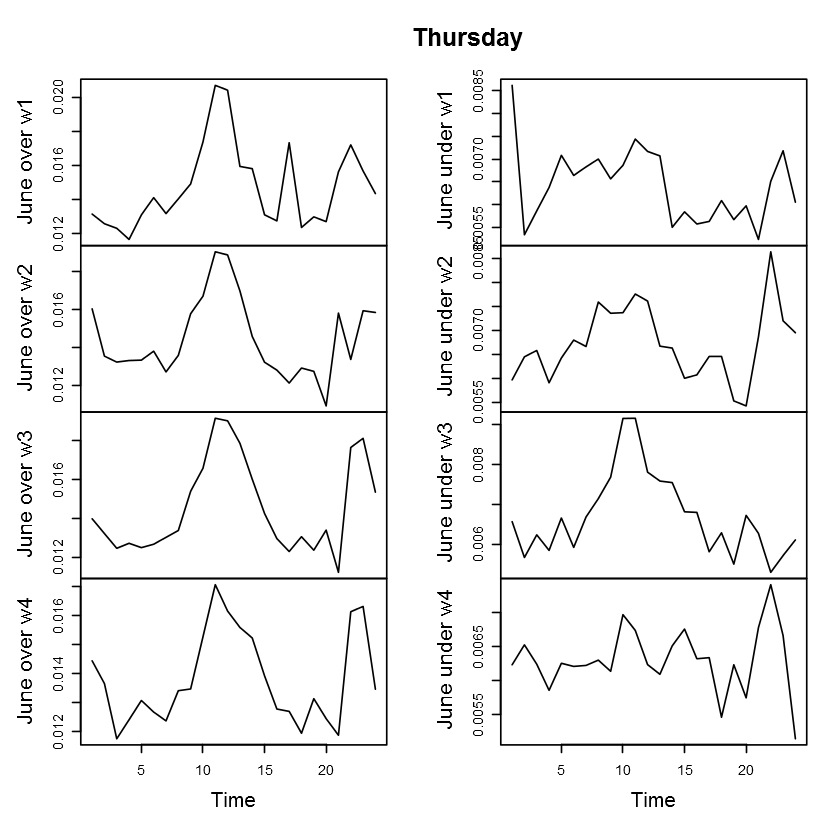

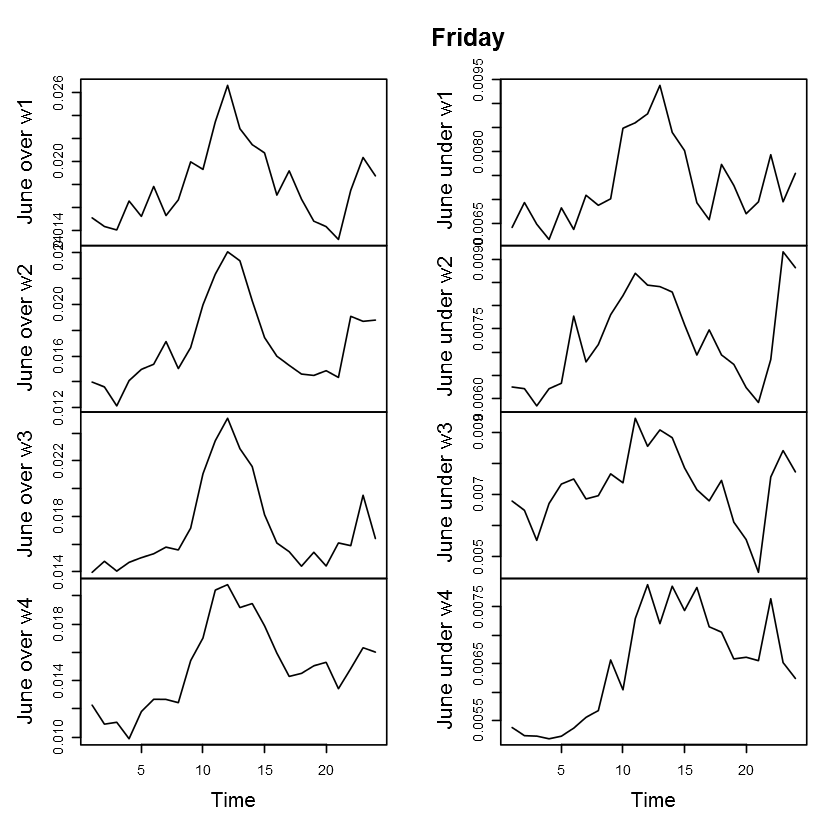

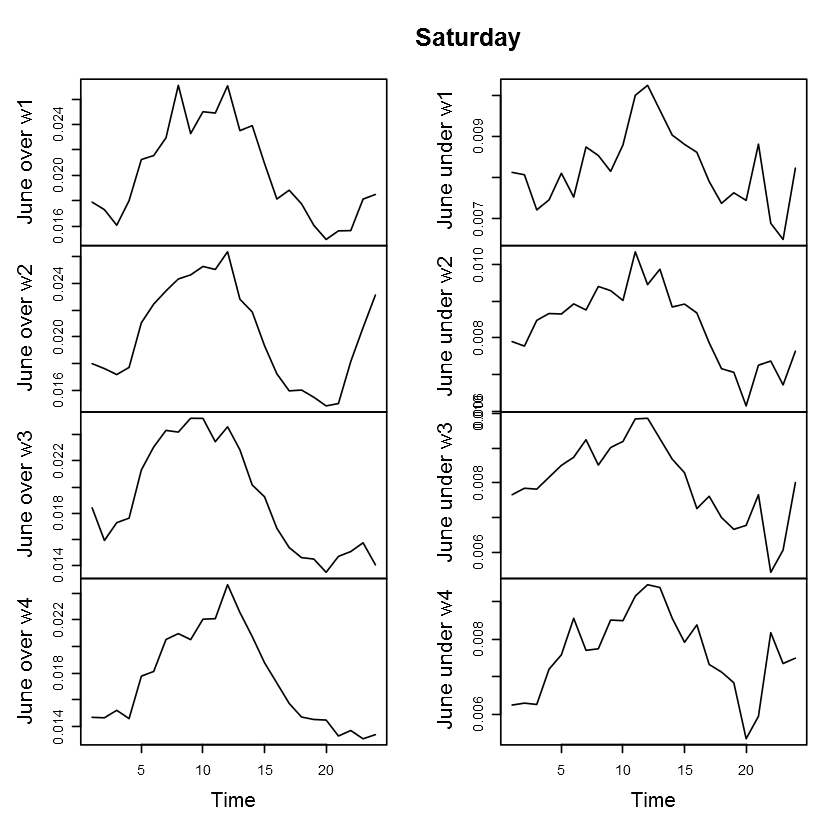

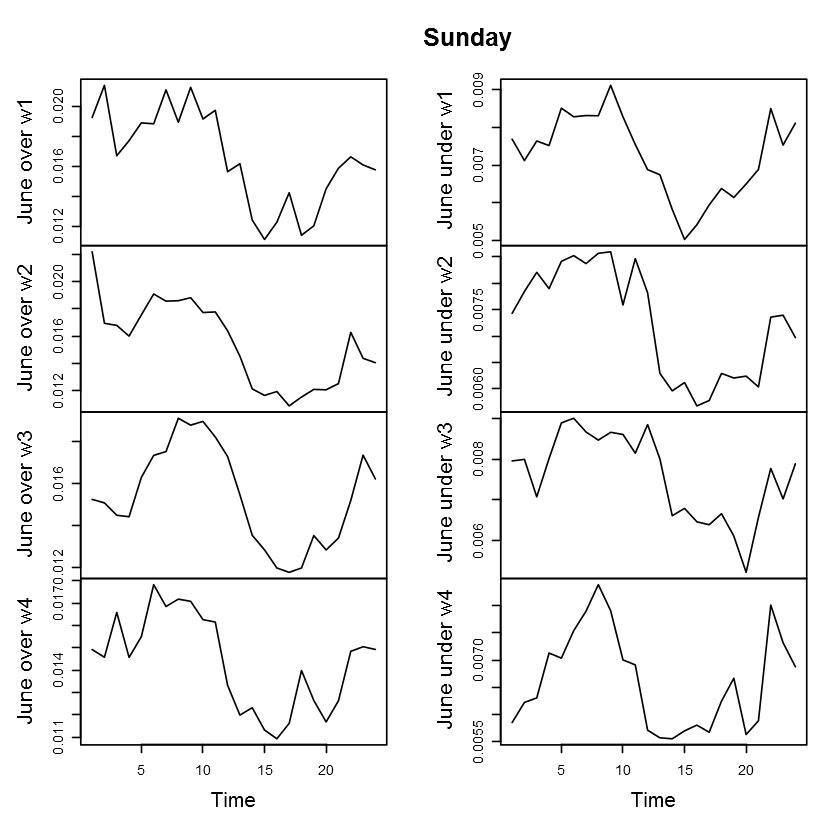

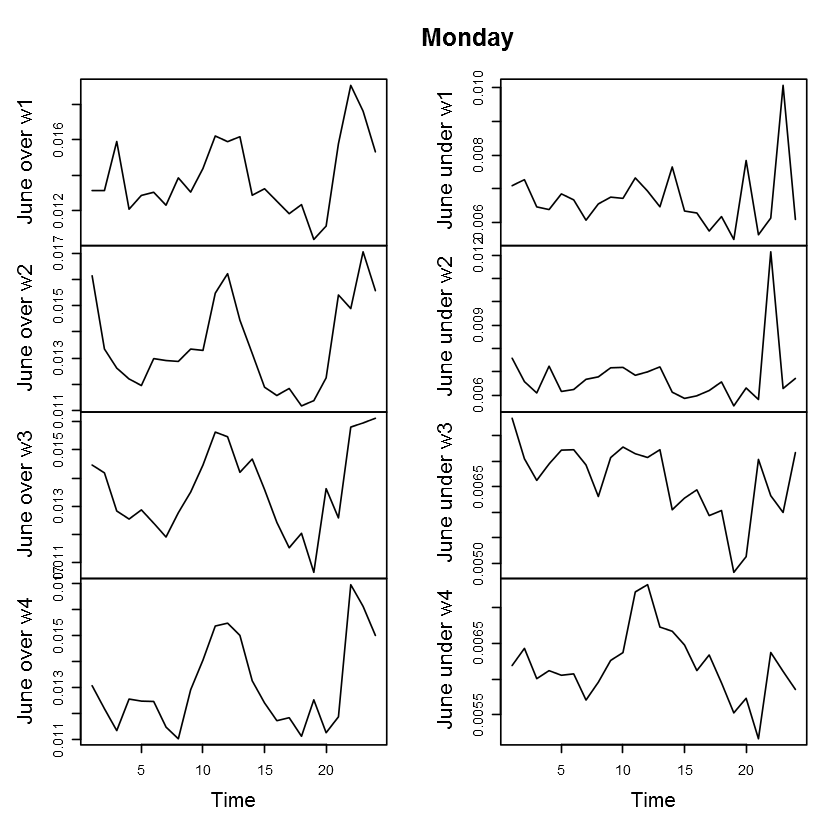

In [148]:
for (weekday in 1:7){
    over_month = data.frame(j_by_weekday[weekday,,])
    colnames(over_month)=c ('June over w1', 'June over w2', 'June over w3', 'June over w4',
                            'June under w1', 'June under w2', 'June under w3', 'June under w4')
    plot.ts(over_month, main=weekdays[weekday])
}

Absolute tweets grouped by day of week, overage vs underage

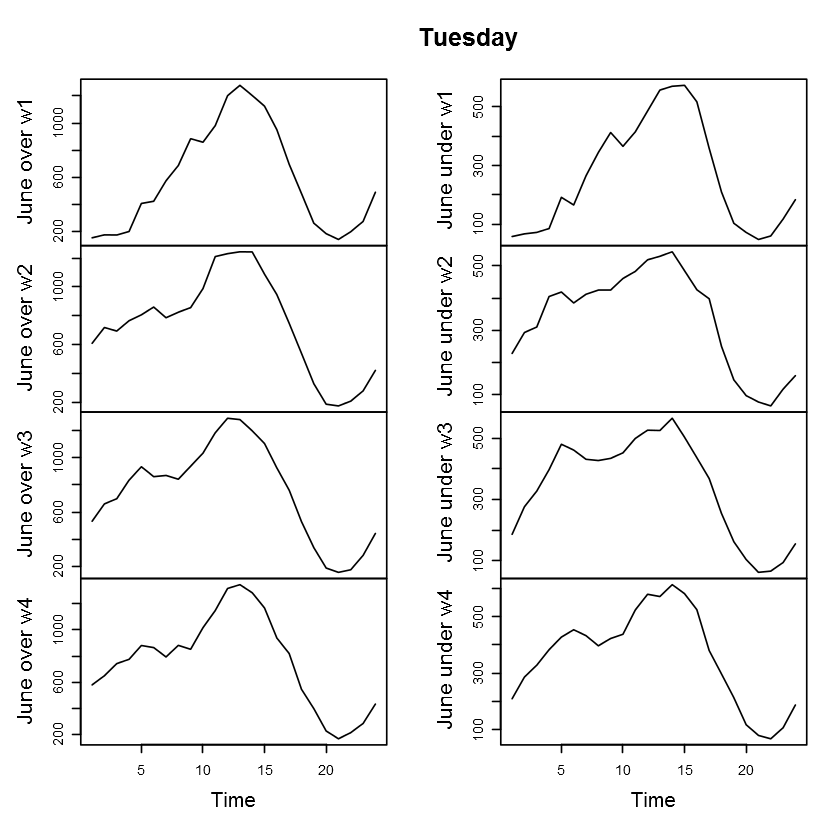

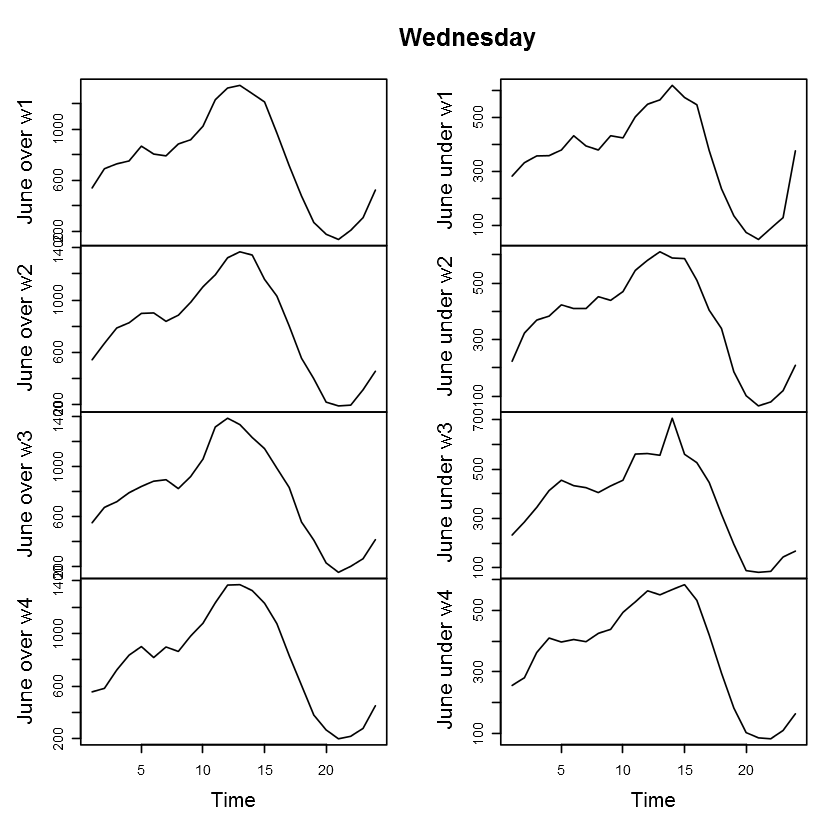

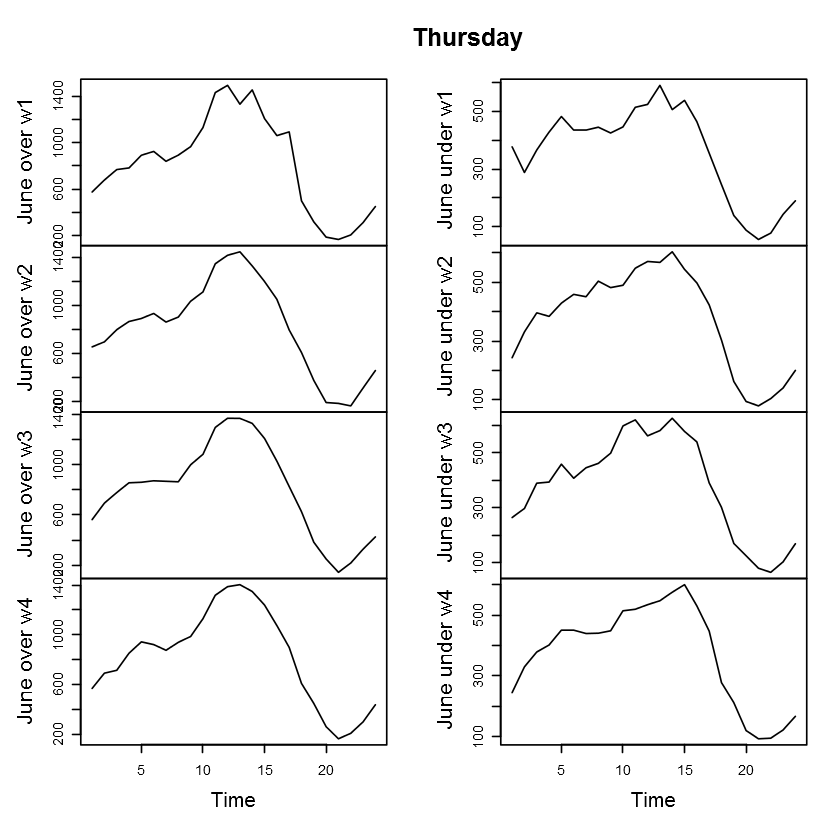

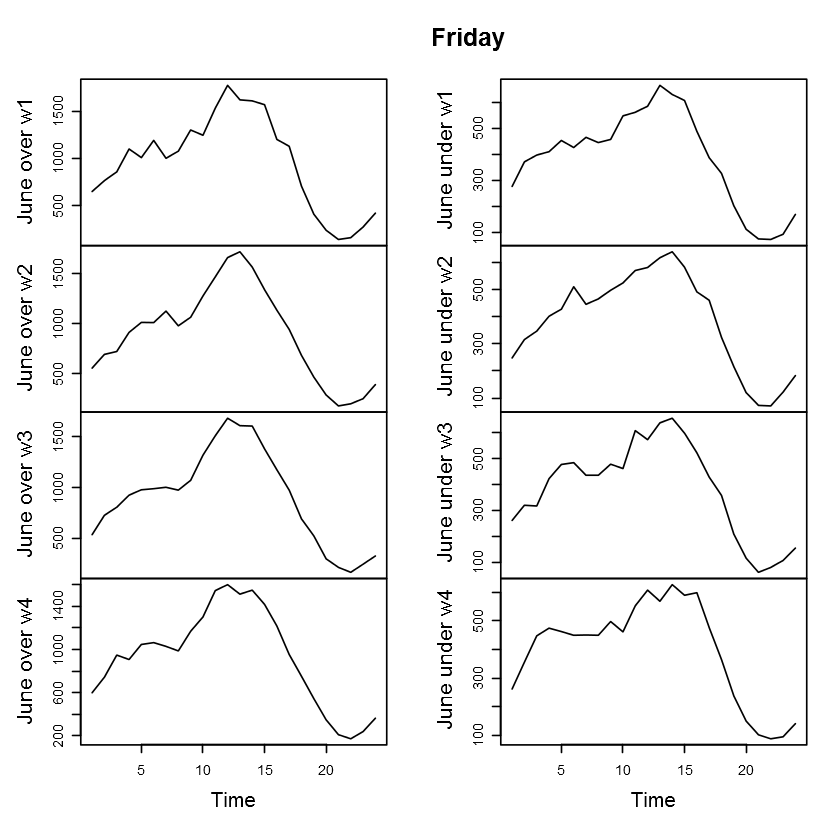

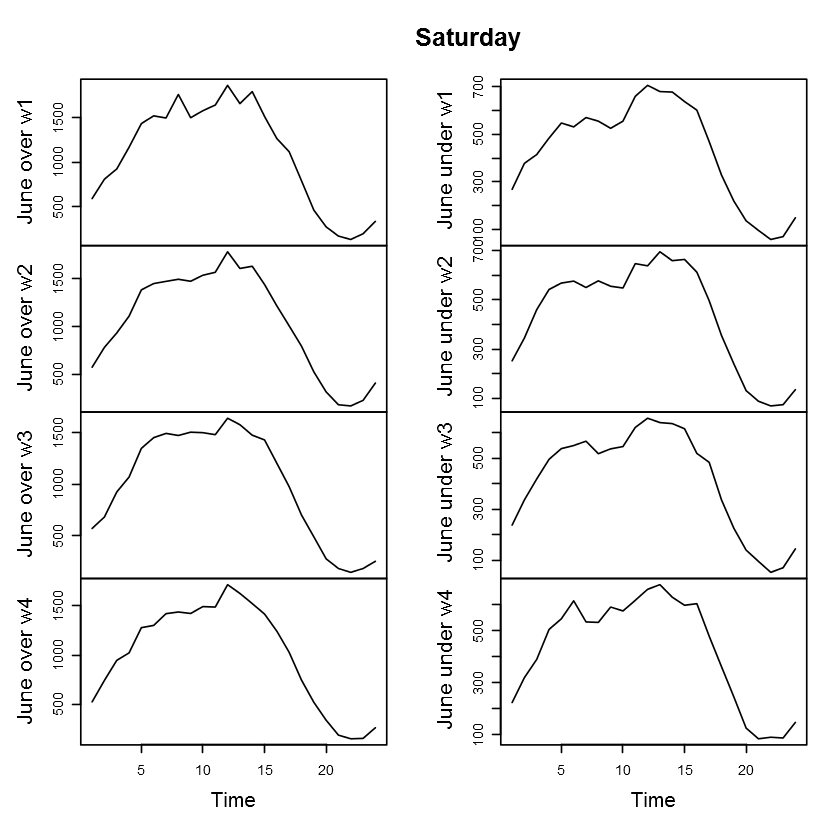

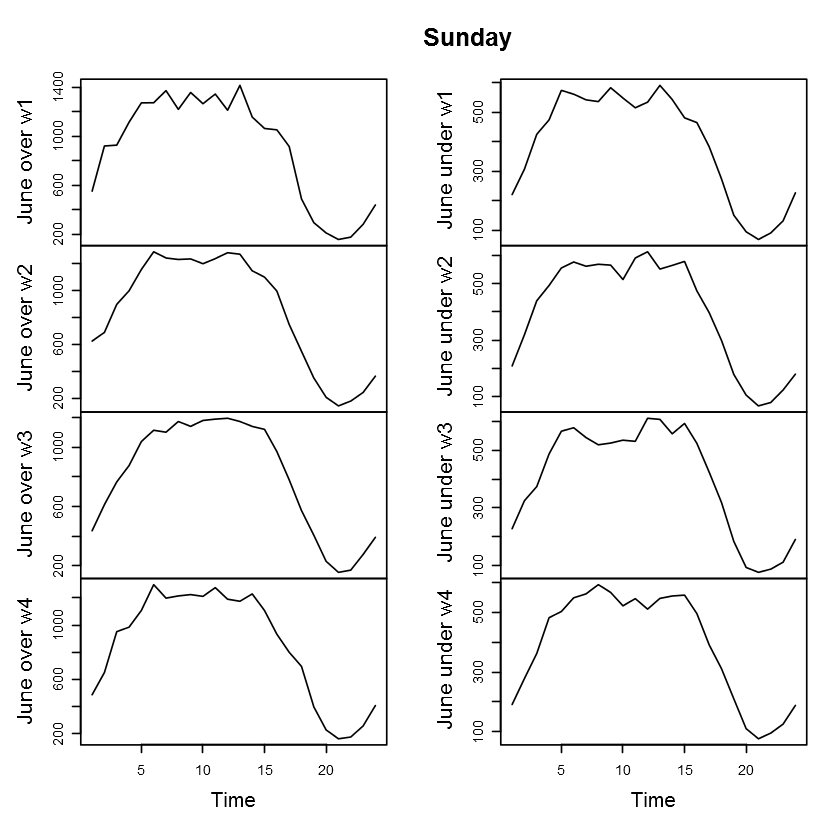

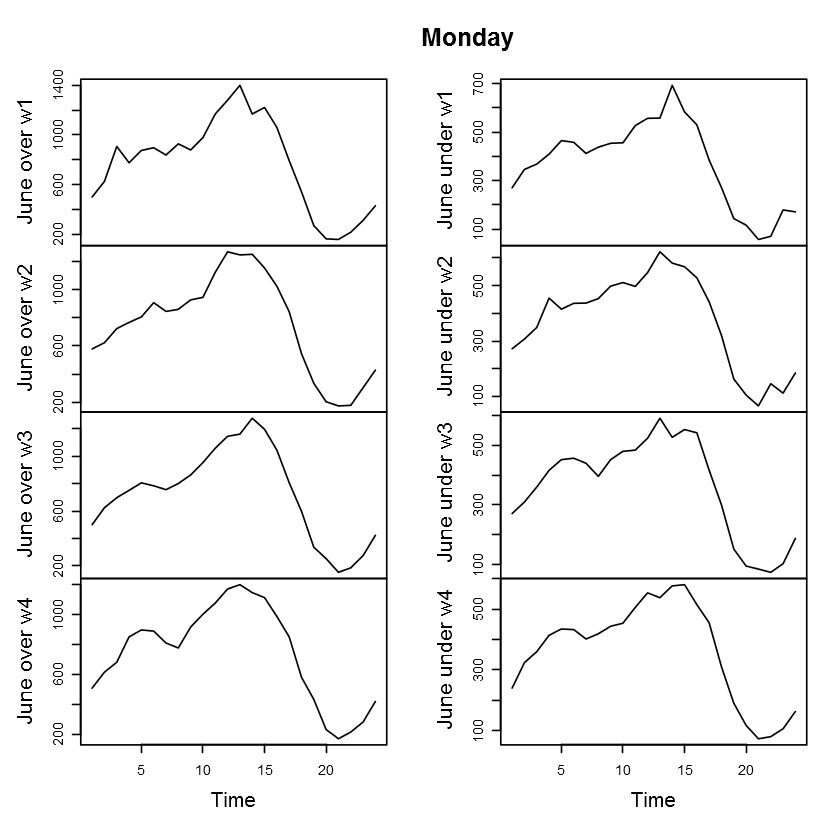

In [92]:
for (weekday in 1:7){
    over_month = data.frame(j_by_weekday[weekday,,])
    colnames(over_month)=c ('June over w1', 'June over w2', 'June over w3', 'June over w4',
                            'June under w1', 'June under w2', 'June under w3', 'June under w4')
    plot.ts(over_month, main=weekdays[weekday])
}

In [150]:
jo_weekday = day_of_week(as.vector(jo))
ju_weekday = day_of_week(as.vector(ju))

In [161]:
june_weekday = day_of_week(as.vector(june))
june_avg_day = apply(june_weekday, 1, rowMeans)
colnames(june_avg_day) = weekdays

In [152]:
jo_avg_day = apply(jo_weekday, 1, rowMeans)
colnames(jo_avg_day) = weekdays

In [153]:
ju_avg_day = apply(ju_weekday, 1, rowMeans)
colnames(ju_avg_day) = weekdays

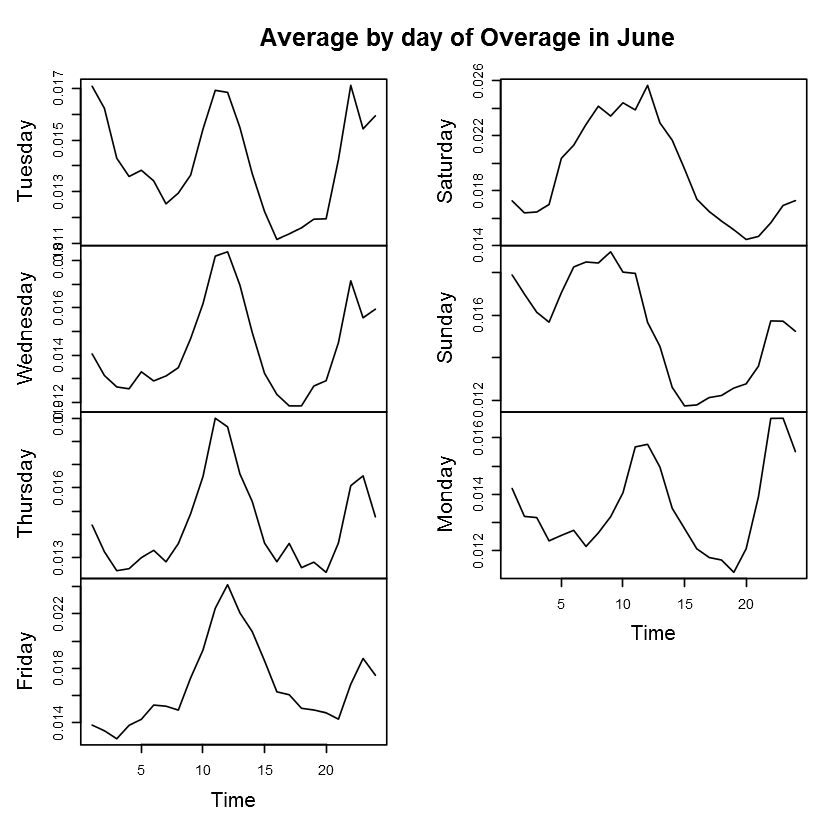

In [154]:
plot.ts(jo_avg_day, main='Average by day of Overage in June')

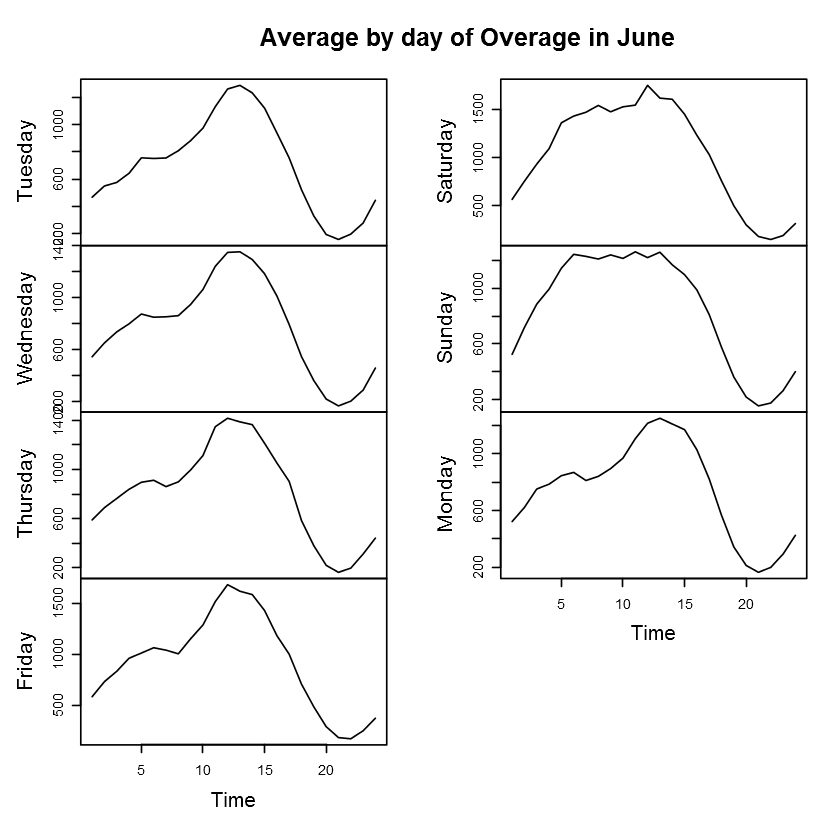

In [97]:
plot.ts(jo_avg_day, main='Average by day of Overage in June')

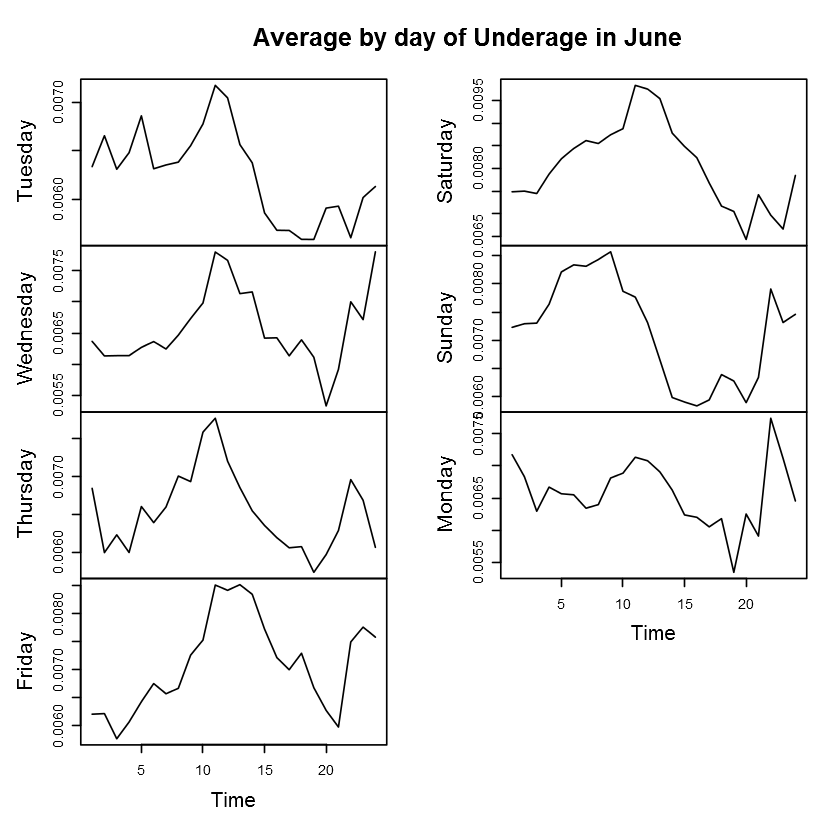

In [155]:
plot.ts(ju_avg_day, main='Average by day of Underage in June')

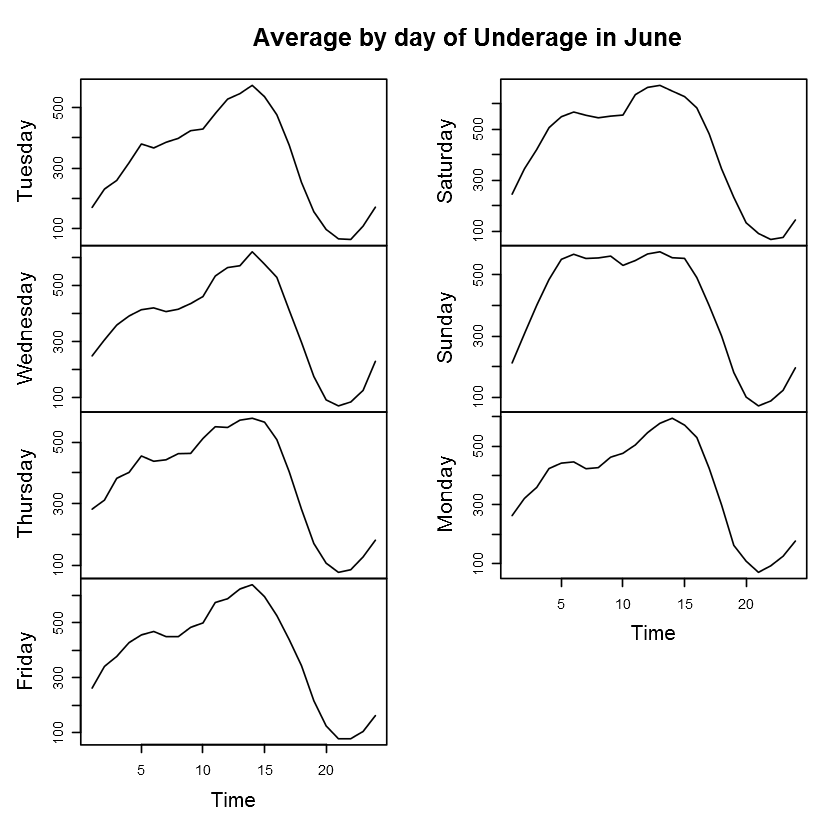

In [98]:
plot.ts(ju_avg_day, main='Average by day of Underage in June')

In [164]:
library(TSclust)

Loading required package: pdc
Loading required package: cluster


In [173]:
dist = diss(normalize(t(june_avg_day)), METHOD='PER')
plot(agnes(dist, diss=TRUE))
pam(dist, 2, diss=TRUE)

ERROR: Error in diss(normalize(t(june_avg_day)), METHOD = "PER"): could not find function "normalize"


In [178]:
normed_j_day = apply(t(june_avg_day), FUN=normalize, MARGIN=2)

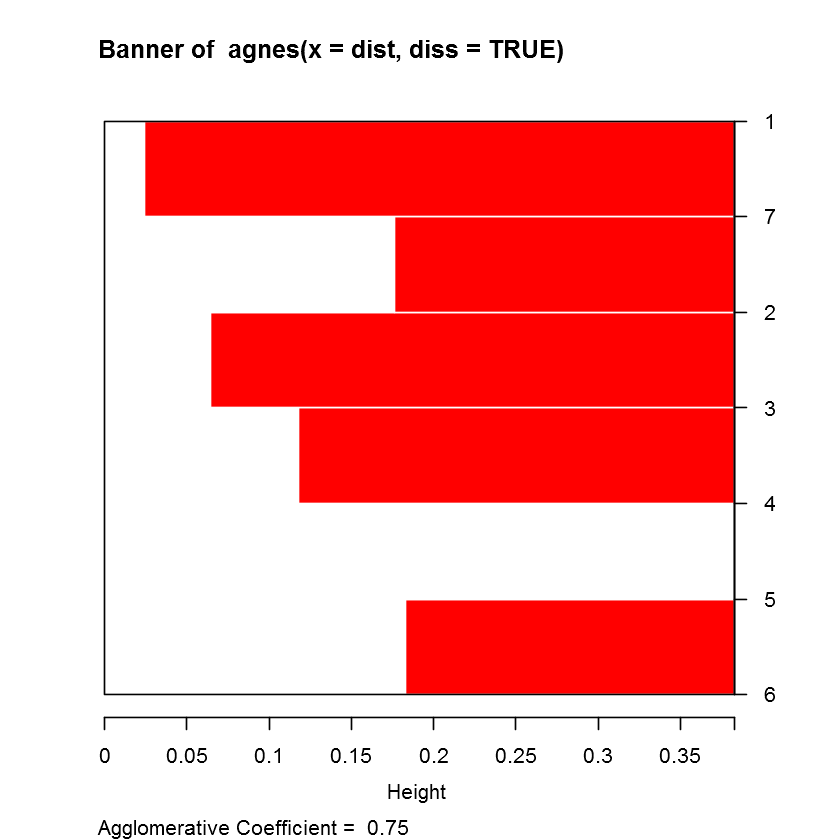

Medoids:
     ID  
[1,]  2 2
[2,]  6 6
Clustering vector:
[1] 1 1 1 1 2 2 1
Objective function:
     build       swap 
0.08661725 0.08661725 

Available components:
[1] "medoids"    "id.med"     "clustering" "objective"  "isolation" 
[6] "clusinfo"   "silinfo"    "diss"       "call"      

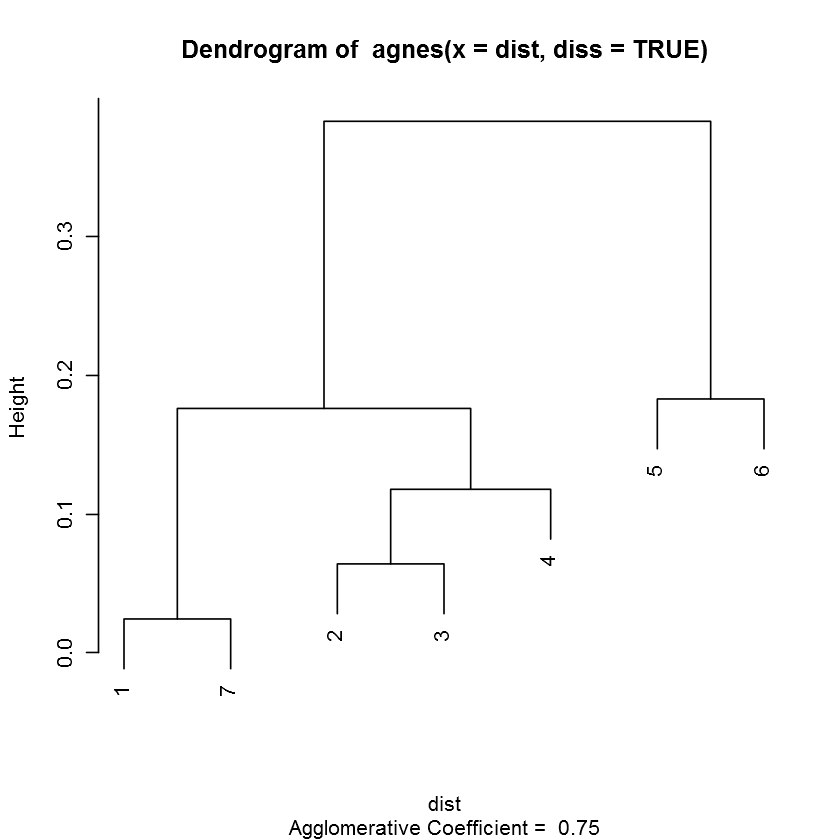

In [185]:
dist = dissimilarity(t(normed_j_day), phase_dist(1))
plot(agnes(dist, diss=TRUE))
pam(dist, 2, diss=TRUE)

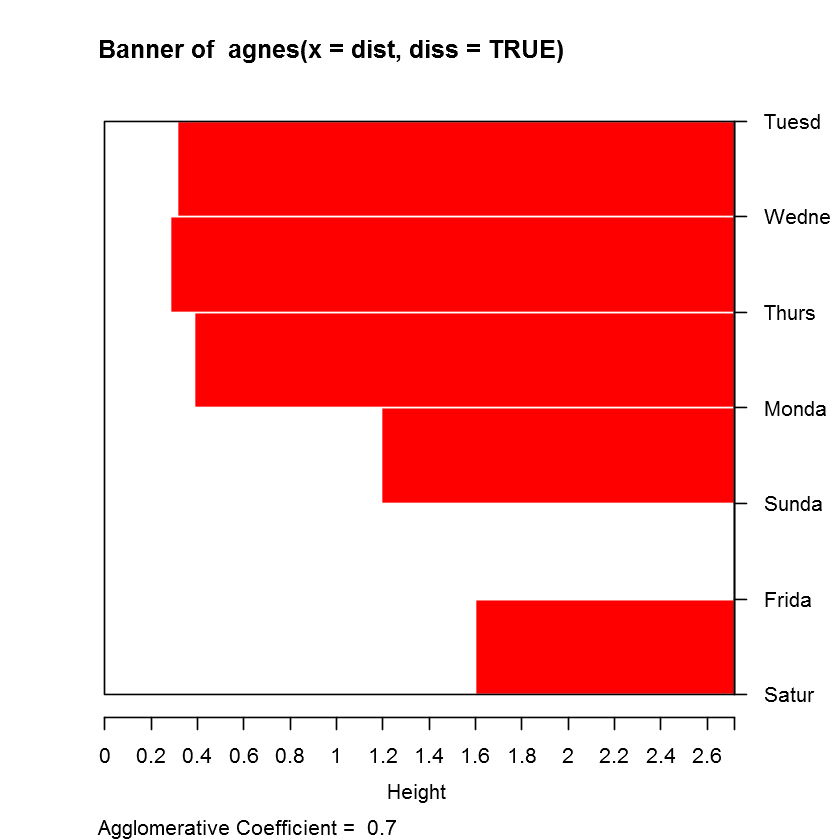

Medoids:
     ID             
[1,] "2" "Wednesday"
[2,] "5" "Saturday" 
Clustering vector:
  Tuesday Wednesday  Thursday    Friday  Saturday    Sunday    Monday 
        1         1         1         2         2         1         1 
Objective function:
    build      swap 
0.5290969 0.5215329 

Available components:
[1] "medoids"    "id.med"     "clustering" "objective"  "isolation" 
[6] "clusinfo"   "silinfo"    "diss"       "call"      

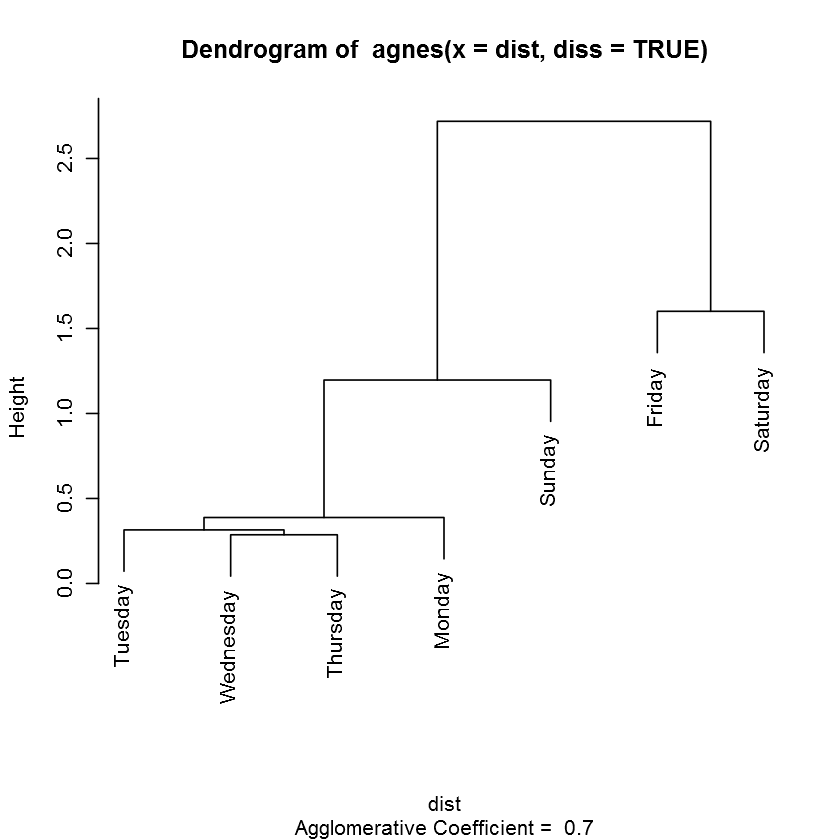

In [181]:
dist = diss(normed_j_day, METHOD='DTW')
plot(agnes(dist, diss=TRUE))
pam(dist, 2, diss=TRUE)

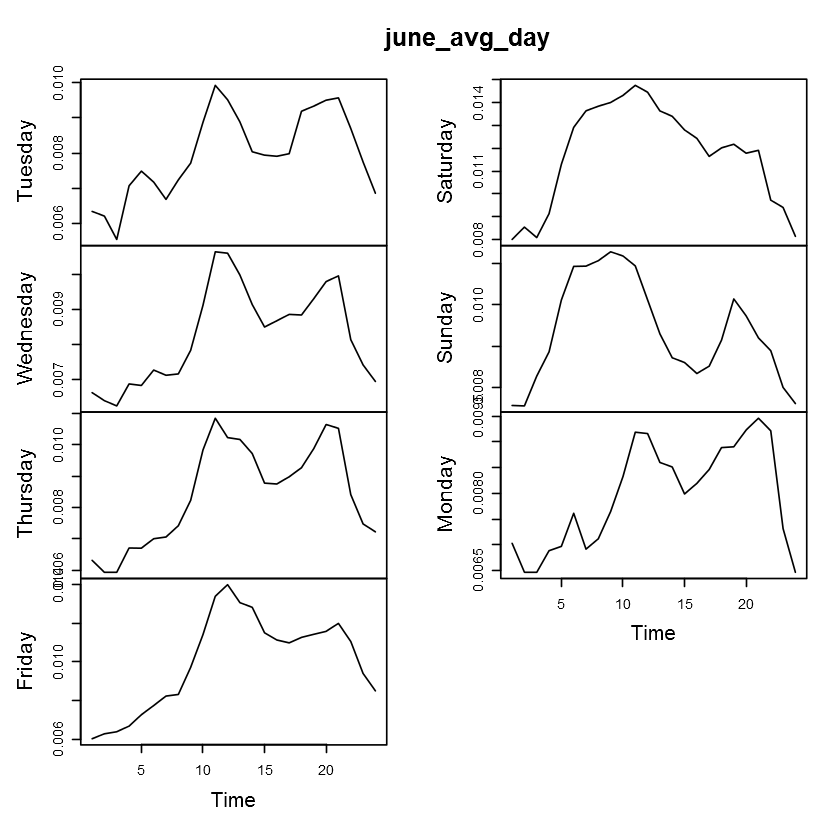

In [162]:
plot.ts(june_avg_day)

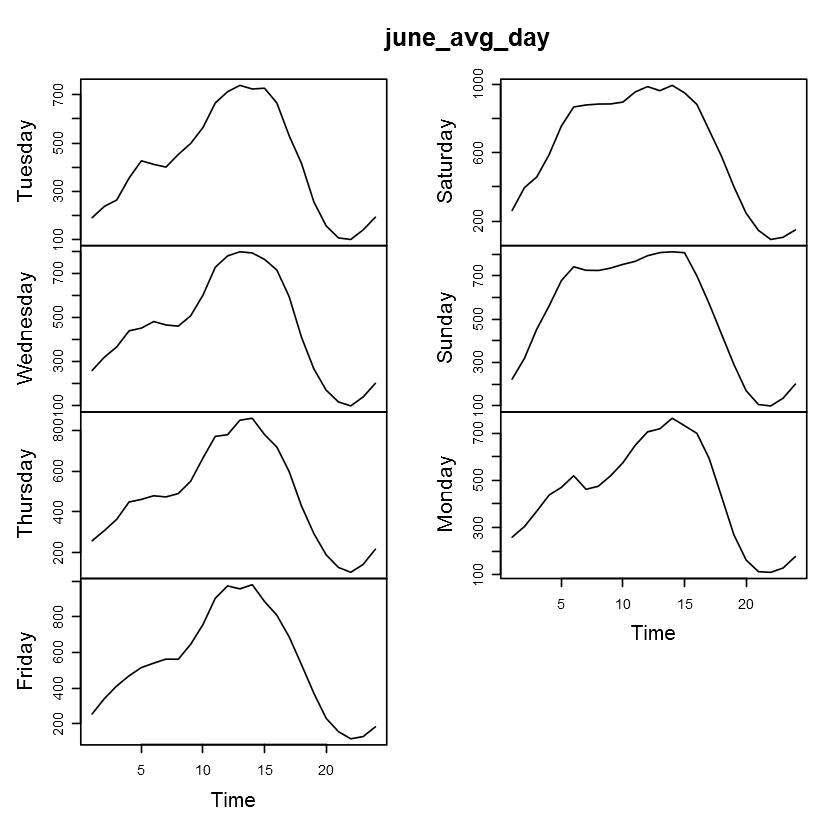

In [106]:
plot.ts(june_avg_day)

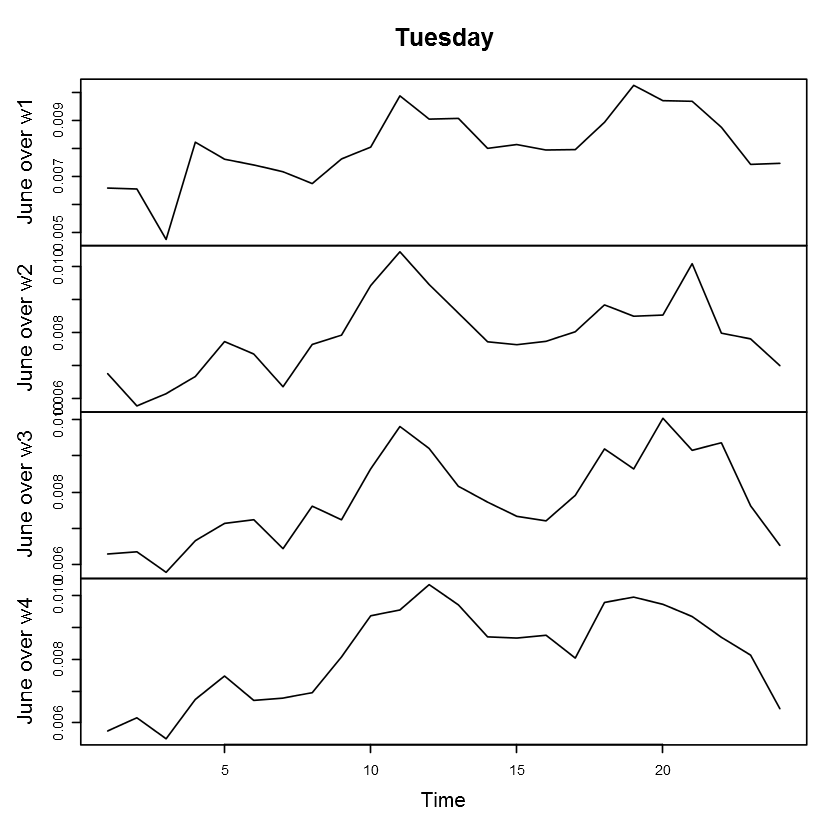

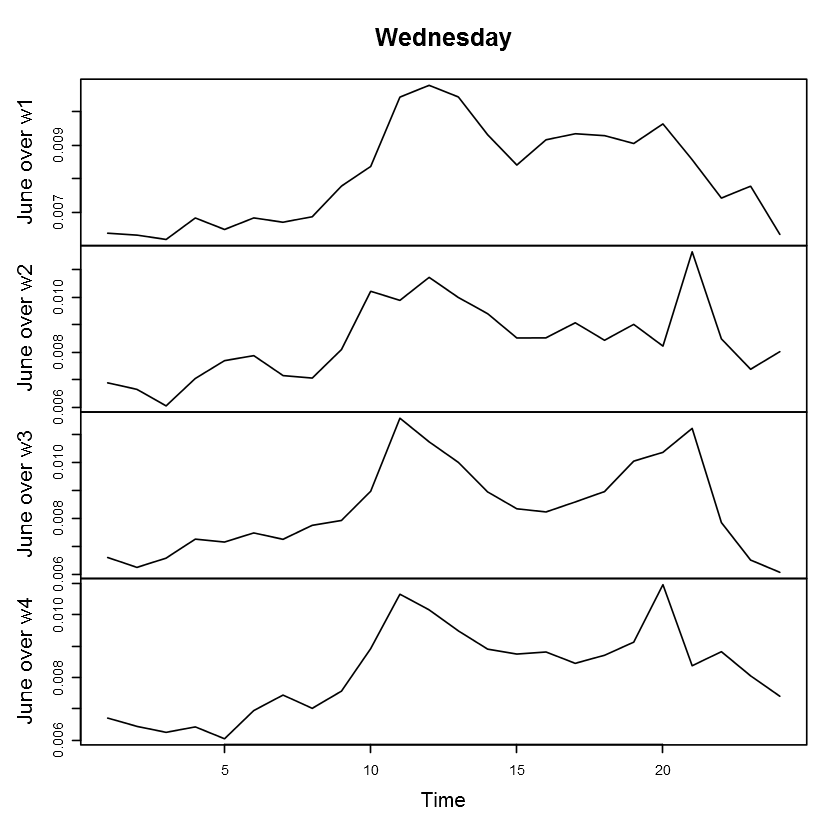

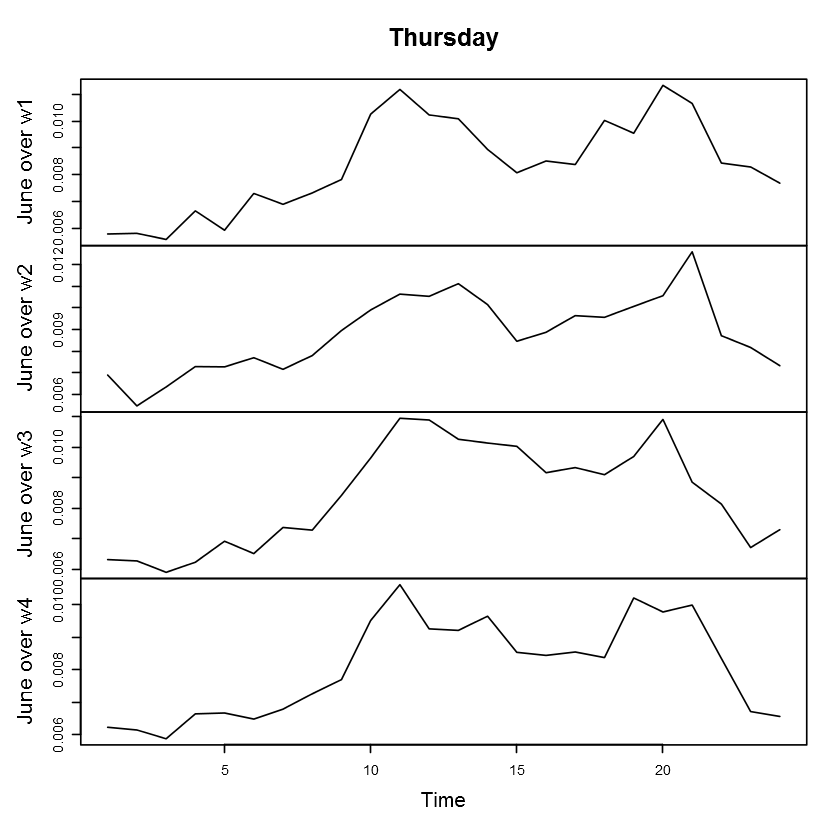

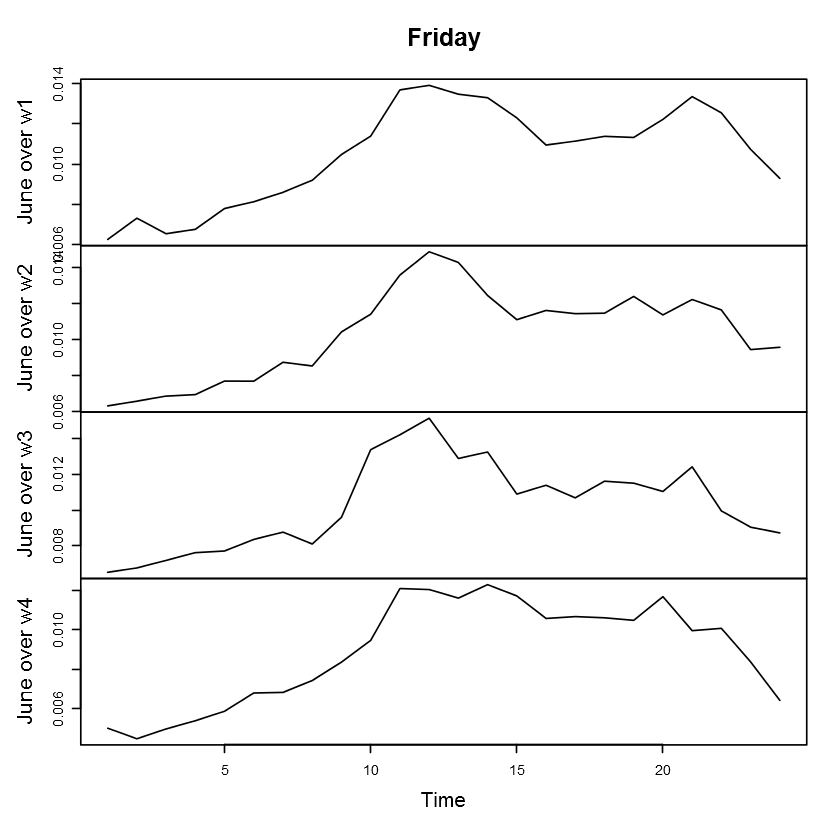

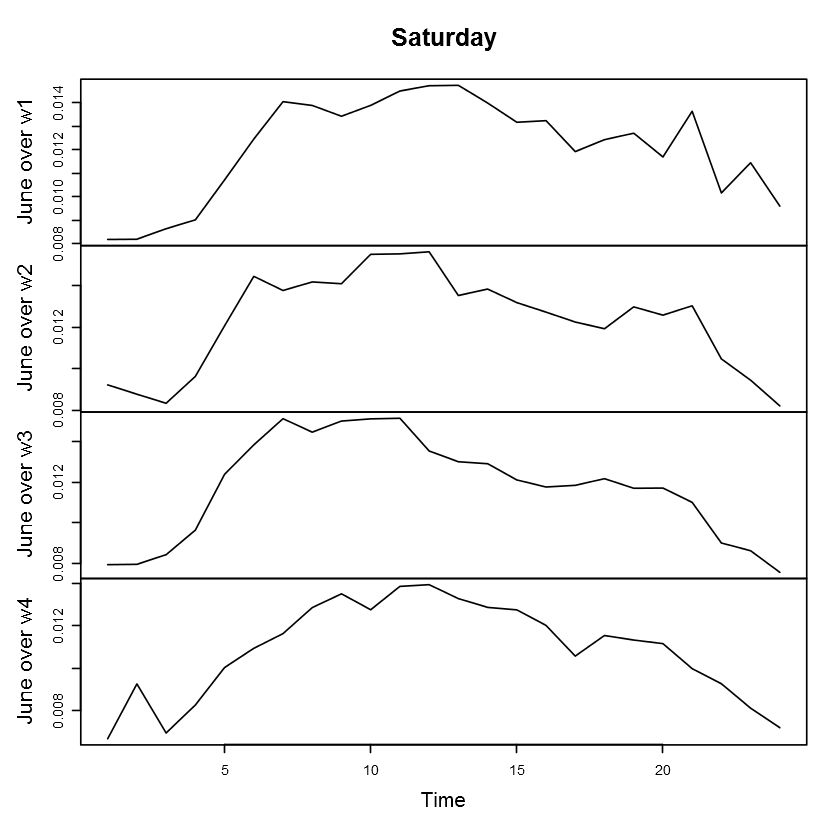

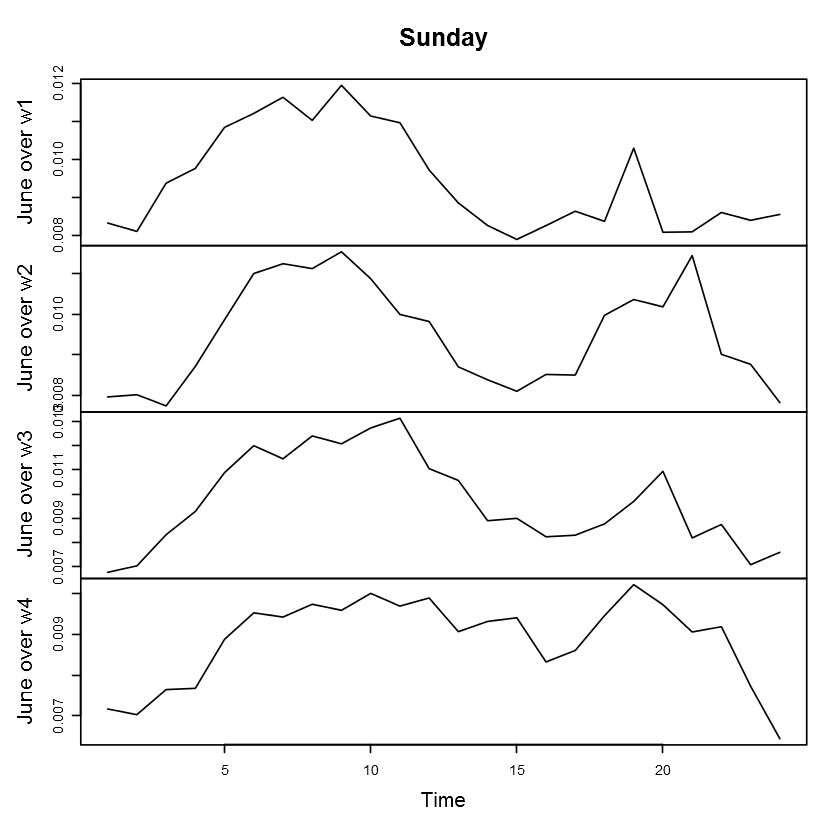

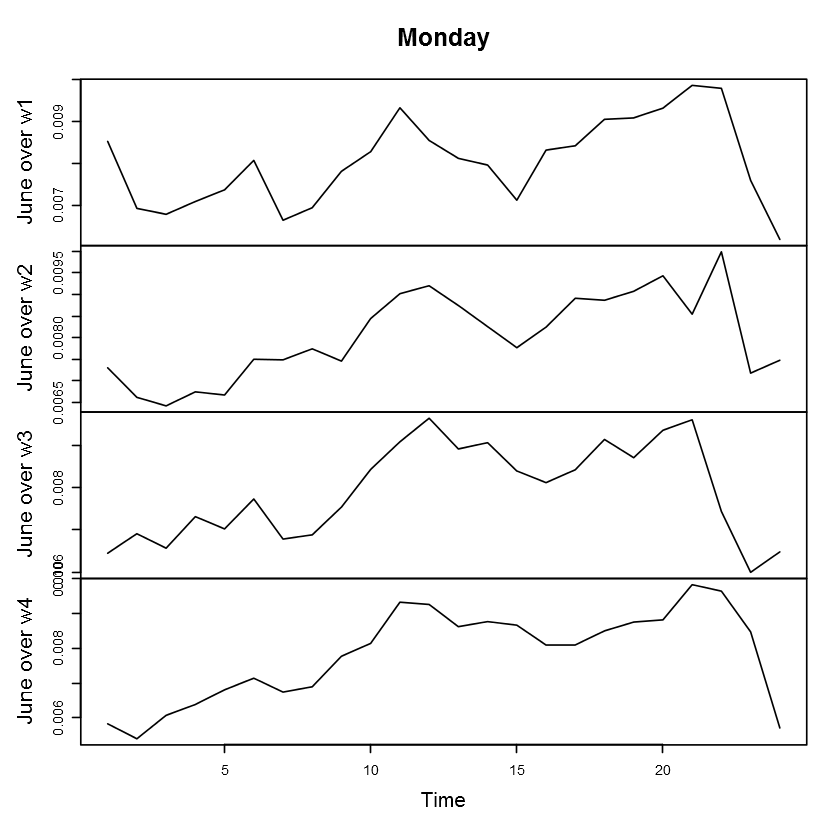

In [88]:
for (weekday in 1:7){
    over_month = data.frame(june_weekday[weekday,,])
    colnames(over_month)=c ('June over w1', 'June over w2', 'June over w3', 'June over w4')
    plot.ts(over_month, main=weekdays[weekday])
}